# HW2
## Exercise 01 | Deja vu
## Tommaso Di Mario, Valeria Sepicacchi, Federica Valeau
## 1)

$ f(x\,|\,\theta) = \frac{\theta^2}{x^3} \cdot \mathrm{e}^{-\tfrac{\theta}{x}}  \quad \text{for} \quad x \geqslant 0 $

To find the maximum likelihood estimator we used the log-likelihood formula:
$ \hat{\theta}_n =  \arg \max{\theta \in \Theta } \ (\ell_n  \ (\theta | x_n ))$

Finding the loglikelihood:
$$
\ell_n  \ (\theta | x_n ) = \sum_{i=1}^n \ log \ f( x_i | \theta) \ = \sum_{i=1}^n  \ log  \ \Big( \ \frac{\theta^2}{x^3} \cdot \mathrm{e}^{-\tfrac{\theta}{x}}  \ \Big) \ = \sum_{i=1}^n  \ log \ \theta^2 \ - \ log \ \Big( x^3_i \ e^{\frac{\theta}{x_i}} \Big) \ = n \ log \ \theta^2 \ - \sum_{i=1}^n  \Big( log  \ x^3_i \ +  log \ e^{\frac{\theta}{x_i}} \Big) = 
\\ = 2n \ log \ \theta \ -  \sum_{i=1}^n  \ log \ x^3_i \ - \sum_{i=1}^n  \ \frac{\theta}{x_i} = \ 2n \ log \ \theta - \sum_{i=1}^n  \ log \ x^3_i \ - \theta \sum_{i=1}^n  x^{-1}_i
$$

Let's maximize the function by finding the derivative and setting it equal to 0

$$
\frac{\delta}{\delta \theta} \ \ell_n \ (\theta | x_n ) \  = \frac{\delta}{\delta \theta} \ \Big( 2n \ log \ \theta - \sum_{i=1}^n  \ log \ x^3_i \ - \theta \sum_{i=1}^n  x^{-1}_i \Big) = \frac{2n}{\theta} - \sum_{i=1}^n  x^{-1}_i = 0 \\
\frac{2n}{\theta} = \sum_{i=1}^n  x^{-1}_i \quad \quad \quad \quad \quad \quad \hat{\theta}_n = \frac{2n}{\sum_{i=1}^n  x^{-1}_i}
$$

In [85]:
# Some useful libraries
import numpy as np
import pandas as pd
import seaborn as sb
from scipy import stats as st
import statsmodels.api as stmod
import matplotlib.pyplot as plt

In [86]:
# Let's look at the wind dataset
df = pd.read_csv("airquality.csv")
df = df.Wind
df

0       7.4
1       8.0
2      12.6
3      11.5
4      14.3
       ... 
148     6.9
149    13.2
150    14.3
151     8.0
152    11.5
Name: Wind, Length: 153, dtype: float64

In [87]:
# Here we find the estimate of the MLE for the wind data

def mle(data):
    summ = 0
    # a for loop to add all the summation values
    for el in data:
        summ += 1/el
    # final formula
    theta_hat = 2*len(data)/summ
    return theta_hat

mle(df)


16.884195992600205

In [88]:
# log-likelihood function with the new theta estimate

def loglike(data, theta):
    summ = 2*len(data)*np.log(theta)
    for el in data:
        summ -= np.log(el**3)
        summ -= theta/el
    return summ

loglike(df, 16.884195992600205)

-463.390317302354

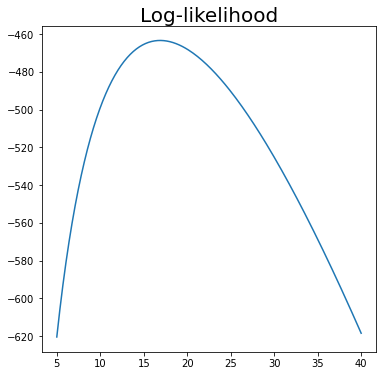

In [89]:
# We check that by plotting the log-likelihood function the maxiumum will occur at approximatly 17 

theta = np.linspace(5,40,200)

plt.title(label='Log-likelihood', 
          fontweight=10, 
          fontsize = 20,
          pad='2.0')

plt.rcParams['figure.figsize'] = [6, 6]
plt.plot(theta,loglike(df, theta))   

# The double check worked fine
 
 

In [90]:
# We check if there are any null values and that the sum of densities sum to one
obs_freq= df.value_counts(normalize = True).sort_index()
print( np.sum(obs_freq))

print(sum(df.isna()))

1.0
0


<AxesSubplot:title={'center':'Wind data'}>

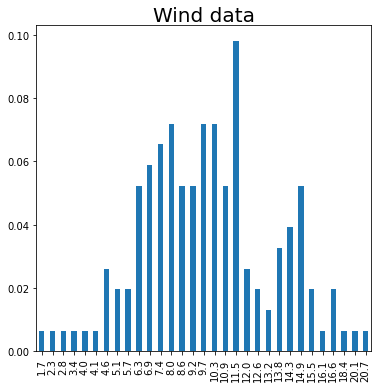

In [91]:
# Plot of the wind data

plt.title(label='Wind data', 
          fontweight=10, 
          fontsize = 20,
          pad='2.0')

obs_freq.plot(kind='bar', label = "Observed frequence")

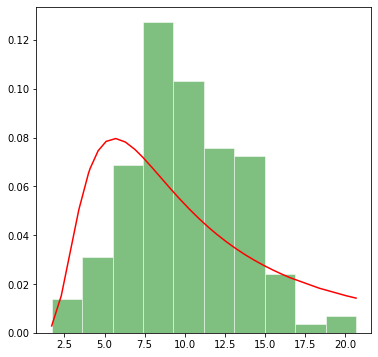

In [92]:
from scipy.interpolate import make_interp_spline

# plotting the data with the optimized pdf

theta = 16.884 #the value of theta optimizied 

data = np.array(df) # convert a list into a np array
# we plot the histogram
bin_values, bin_edges, patches = plt.hist(data, density=1, facecolor='green', edgecolor = 'white', alpha=0.5)

#the function f returns the values depending on the variable x, computed using theta optimal 
def f(x, t):
    return t**2/(np.exp(t/x)*x**3) 
y = []
s_xn = list(sorted(df))# we sort df because we want to pass it as input  to the function
for el in s_xn:
    y.append(f(el,theta) ) # we compute the y using the theta optimized using MLE
plt.plot(s_xn, y, color="red") 
plt.show()

In [93]:
# let's look at the mean of the data 
print('Mean = '+ str(df.mean()))
print('Variance = '+ str(df.var()))

Mean = 9.95751633986928
Variance = 12.41153852769178


We evaluate the mean with the MLE through the given formula $ E(x) = \frac{\theta}{2}  = 8.44 $

The value is quite different from the one we got from the data.
Then the variance will be $ Var(X) = \frac{x^2}{4} = 71.23 $

This value denotes a clear lack of fit, observable also from the plot.

## 2)
The important properties that we consider to solve this exercise are the following:
1. Thanks to the equivariance of the MLE we know that is $\hat{\theta}_n$ denotes the MLE for $\theta$ then $\hat{\tau}_n=h(\hat{\tau}_n$) is the MLE for $\tau$.
2. For large samples, the sampling distribution of $\hat{\theta}_n$ can be approximated by a Normal, because it is asymptotically Gaussian.

To get the MLE for $\tau$ we use the first property and our smooth function is $h(\theta)$ (smooth because there exists its first derivative and it's different from zero in $ \theta $), respresenting the average wind speed. Then we can easily get the MLE 
$$ \hat{\tau} = h(\hat{\theta})= \frac{\hat{\theta}}{2}= 8.44$$

The second aim is to obtain the standard error of this new estimator, computed in the following way 

$$
\hat{se}(\hat{\tau} _n)=|h'(\hat{\theta} _n)|\hat{se}(\hat{\theta} _n)
$$
We decided to use the Fisher Information to compute $ \hat{se}(\hat{\theta}) $, that is
$$ 
\mathcal{I}(\theta)=- \mathbb{E}\left(\frac{\partial}{\partial \theta} s(X| \theta)\right)=- \mathbb{E}\left(\frac{\partial^2}{\partial \theta ^2} log f(X| \theta)\right)
$$

then the first order derivative is 
$$
\frac{\partial }{\partial \theta} = \frac{2}{\theta}-\frac{1}{x}
$$ 
and the second order one 
$$ 
\frac{\partial ^2}{\partial \theta ^2} = - \frac{2}{\theta ^ 2}
$$
$$
\mathcal{I}(\theta) = - \mathbb{E}\left(- \frac{2}{\theta ^ 2}\right)= \frac{2}{\theta ^2}
$$
The asymptotic se can be approximated by $ \hat{se} \approx [\mathcal{I}_n(\hat{\theta})]^{-\frac{1}{2}} $ but since we have IID samples $ \mathcal{I}_n(\hat{\theta})=n\mathcal{I}(\hat{\theta})$  and  
$$ 
\hat{se} \approx [n\mathcal{I}(\hat{\theta})]^{ - \frac{1}{2}} = [n(\frac{2}{\hat{\theta} ^2})]^{-\frac{1}{2}}
$$
We can finally compute 
$$ 
\hat{se}(\hat{\tau} _n)=|h'(\hat{\theta} _n)|\hat{se} \left( \hat{\theta} _n \right) = \frac{1}{2} \left(\frac{2n}{\hat{\theta}^2} \right)^{-\frac{1}{2}}
$$

In [94]:
#Use the properties and asymptotics of MLE to get an estimate of the average wind speed together 
#with a quatification of the estimator standard error.
import pandas as pd
from scipy import stats

df_2 = pd.read_csv("airquality.csv", header = 0)
df_2 = df_2["Wind"]
theta = 16.88 #this is the MLE for theta, computed in the previous exercise
n=153 
#prima cosa facciamo il se di theta cappelletto
#Inf computes Fisher Information given an estimator theta
def Inf(theta):
    # the second order derivative is -2/(theta)**2
    #the expectation of a constant is the constant itself 
    return (2/((theta)**2))*n
#multiplied by n since it is the Fisher information of n IID random variables

def se_theta(theta): #computes the standard error with respect to the estimator theta
    return (Inf(theta))**(-1/2)

def se_tau(theta): #returns the standard error with the new parameter tau
    return (1/2)*(se_theta(theta))
print("the new estimator standard error is ", round(se_tau(theta),2))

the new estimator standard error is  0.48


## 3)
Now we proceed comparing the Nonparametric Bootstrap solution for the standard error with the previous one.
In the nonparametric bootstrap, the random data is created by resampling with replacement from the original data, that's why we used the method called sample with the parameter "replace" set to True.
The procedure is as follows:
- Resample, create n bootstrap samples by sampling with replacement form the original data
- estimate $\theta$. From each bootstrap sample denote the resulting estimate $ \hat{\theta}^*$
- compute statistics, in our case the standard error, but we will also include bias and variance.
The bootstrap samples inherit the same distribution as the original data.

The standard error in Nonparametric bootstrap is the following 
$$
\widehat{se}_{boot}(\widehat{\theta})= \sqrt{\frac{1}{n-1}\sum_{j=1}^{n}(\hat{\theta}^*_j-\bar{\theta}^*)^2}
$$

In the following cells we used the numpy.std() method as we did in class

In [95]:
import numpy as np
import matplotlib.pyplot as plt

df_3 = pd.read_csv("airquality.csv", header = 0)
df_3 = df_3["Wind"]

B = 1000
boot = np.zeros(B)
for b in range(B):
    x_boot   = df_3.sample(n = 153, replace = True)
    #Pandas sample() is used to generate a sample random row from the function caller data frame.
    boot[b] = x_boot.mean()
# Nonparametric Bootstrap Estimate of the Standard Error for the plug-in estimator of the sample mean
print("Nonparametric bootstrap standard error:",round(boot.std(),2))
# Nonparametric Bootstrap Estimate of the Bias for the plug-in estimator of the sample mean
boot_bias = boot.mean() - df_3.mean() 
print("Nonparametric bootstrap bias:",round(boot_bias,2))
#plt.hist(boot, density = 1, facecolor='green', edgecolor = 'white', alpha=0.5)

Nonparametric bootstrap standard error: 0.29
Nonparametric bootstrap bias: -0.0


The standard error is an important indicator of how precise an estimate of the population parameter the sample statistic is, is the measure of the accuracy of a mean and an estimate. A smaller standard error indicates an higher precision, that's the reason why we are more satisfied with the result obtained in the Nonparametric bootstrap, rather than the one that referred to $ \hat{\theta}$

## 4)

Now we have to find the estimator standard error using parametric bootstrap. We tried three different models: Rayleigh, Normal and Gamma distributions. We'll analyze later which one is the best.

In [96]:
# This is the mean taken from the dataset, we'll use it for a comparison with the parametric bootstrap results.
df.mean()

9.95751633986928

In [97]:
# This is the mean taken from the dataset, we'll use it for a comparison with the parametric bootstrap results.
df.mean()

9.95751633986928

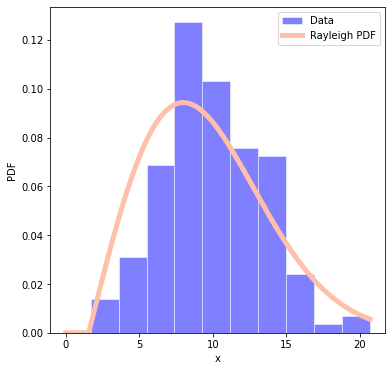

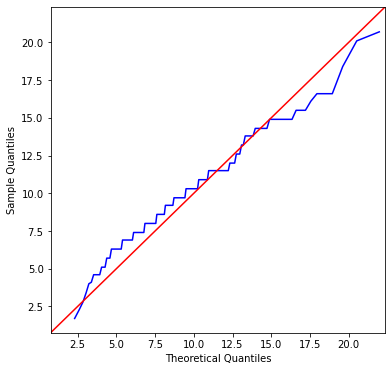

In [98]:
# Finding the location and the scale for the Rayleigh model
loc_r, scale_r = st.rayleigh.fit(df)

# Evaluate fitted PDF 
rv_fit_r  = st.rayleigh(loc = loc_r, scale =scale_r)
grid  = np.linspace(0, df.max(), num = 501)
pdf_r = rv_fit_r.pdf(grid)

# Plot with histogram
plt.hist(df, density = 1, facecolor='blue', edgecolor = 'white', alpha=0.5, label = "Data");
plt.plot(grid, pdf_r, '#fec0ab', linewidth = 5, label = "Rayleigh PDF");
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend(loc='upper right');
plt.show()

# Quantile-quantile plot
stmod.qqplot(data = df, dist = st.rayleigh(loc_r, scale_r), line='45', fmt='b')
plt.show()

# The approximation is not excellent but it works okay

In [99]:
# Comuputing the mean using equivariance
mean_r = loc_r + scale_r*np.sqrt(np.pi/2) 
print(mean_r)

# As we can see, the mean is quite similar to the original one

9.628281420838528


In [100]:
# Evaluating the Standard Error of the Mean Estimator
B = 500
boot_stat_r = np.zeros(B)
for b in range(B):
    # finding the sample for the fitted population
    x_bt_r = rv_fit_r.rvs(len(df)) 
    # bootstrapped location and scale
    loc_br, scale_br = st.rayleigh.fit(x_bt_r)  
    # Computing the bootstrap version of MLEs using equivariance
    boot_stat_r[b] = scale_br*np.sqrt(np.pi/2) + loc_br  
    
# Here we print the estimator standard error
print(boot_stat_r.std()) 

0.3105528790822953


Let's try with the normal distribution, it's pdf is
$ f(x) = \frac{e^{- \frac{x^2}{2}}}{\sqrt{2 \pi}} $

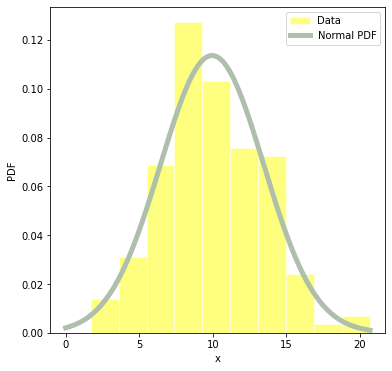

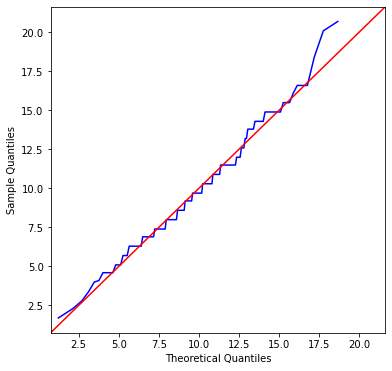

In [101]:
# let's try with the Normal distribution
loc_n, scale_n = st.norm.fit(df)

# Evaluate fitted PDF 
rv_fit_n  = st.norm(loc = loc_n, scale =scale_n)
grid  = np.linspace(0, df.max(), num = 501)
pdf_n = rv_fit_n.pdf(grid)

# Plot with histogram
plt.hist(df,  density = 1, facecolor='yellow', edgecolor = 'white', alpha=0.5,label = "Data");
plt.plot(grid, pdf_n, '#aec0ab', linewidth = 5, label = "Normal PDF");
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend(loc='upper right');
plt.show()

# Quantile-quantile plot
stmod.qqplot(data = df,  dist = st.norm(loc_n, scale_n), line='45', fmt='b')
plt.show()

In [102]:
mean_n = rv_fit_n.stats()[0]
B = 500
boot_stat_n = np.zeros(B)

for b in range(B):
    # finding the sample for the fitted population
    x_bt_n = rv_fit_n.rvs(len(df)) 
    # bootstrapped location and scale
    loc_bn, scale_bn = st.norm.fit(x_bt_n)  
    # Computing the bootstrap version of MLEs using equivariance
    boot_stat_n[b] = scale_bn*np.sqrt(np.pi/2) + loc_bn
    
print(boot_stat_n.std()) 

# This is tworst than the previous result, the estimate standard error is greater

0.3496123336633952


The last try will be the Gamma distribution, its pdf is $$ f(x, \alpha) = \frac{x^{\alpha - 1} \ e^{-x}}{\Gamma (\alpha)} $$

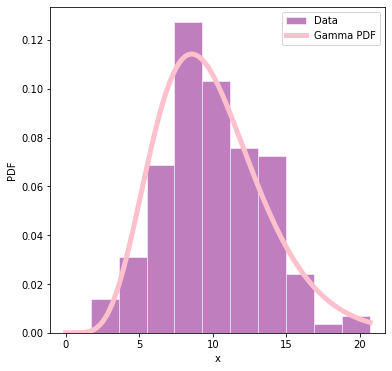

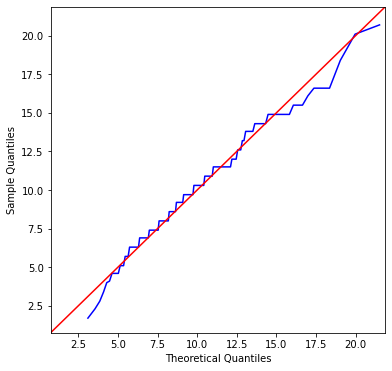

In [103]:
alpha, loc_g, beta = st.gamma.fit(df, floc = 0)  
rv_fit_g  = st.gamma(a = alpha, loc = loc_g, scale = beta)

# Evaluate the estimated PDF 
grid  = np.linspace(0, df.max(), num = 501)
pdf_g = rv_fit_g.pdf(grid)

# Plotting pdf and histogram
plt.hist(df, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5, label = "Data");
plt.plot(grid, pdf_g, '#fdc0cc', linewidth = 5, label = "Gamma PDF");
plt.xlabel('x')
plt.ylabel('PDF')
plt.legend(loc='upper right');
plt.show()

# Quantile-quantile plot
stmod.qqplot(data = df, dist = st.gamma(alpha, loc_g, beta),  line='45', fmt='b')
plt.show()

In [104]:
# Gamma mean
mean_g = alpha*beta + loc_g
B = 500
boot_stat_g = np.zeros(B)
# bootstrapping
for b in range(B):
    x_bt_g = rv_fit_g.rvs( len(df) )     
    a_bg, loc_bg, b_bg = st.gamma.fit(x_bt_g, floc = 0) #forcing location to zero
    boot_stat_g[b]     = a_bg*b_bg + loc_bg    

# Bootstrapped estimate standard error
print( boot_stat_g.std() ) 

0.3052443340385554


The Gamma model has the best fit, we cannot say the same for the other models.

Comparing the normal model estimate standard error with the non parametric solution, we can say that when we use an accurate model the results are very similar and also very good, while when we use a model that is not appropriate, the estimate standard error of the parametric solution is much greater.

### Exercise 02 | Toy portfolio

Suppose that we have two random variables $X$ and $Y$ which represent the yields of two financial assets. 

We will invest a fraction of our money, say $\omega$, in $X$ and the remaining fraction $(1 - \omega)$ in $Y$.

Our yield will hence be
$$
\omega \cdot X + (1 - \omega) \cdot Y.
$$
Because this is a random quantity, we may want to choose $\omega$ to minimize the variance of our investment. <br>
One can show that the value of $\omega$ minimizing
$$
\mathbb{V}\text{ar}\big( \omega \cdot X + (1 - \omega) \cdot Y \big),
$$
is indeed
$$
%\begin{equation}\label{eq:opt}
\omega^\star = \frac{\sigma^2_Y - \sigma_{X,Y}}{\sigma^2_X + \sigma^2_Y - 2\cdot \sigma_{X,Y}},
%\end{equation}
$$

where $\sigma^2_X = \mathbb{V}\text{ar}(X)$, $\sigma^2_Y = \mathbb{V}\text{ar}(Y)$, $\sigma_{X,Y} = \mathbb{C}\text{ov}(X,Y)$.


Given a random sample $\big\{ (X_1,Y_1), \ldots, (X_n,Y_n)\big\}$ for the returns, we can compute the following plug-in estimator for $\omega^\star$
$$
\widehat{\omega} = \frac{ \widehat{\sigma}^2_Y - \widehat{\sigma}_{X,Y}}{\widehat{\sigma}^2_X + \widehat{\sigma}^2_Y - 2\cdot \widehat{\sigma}_{X,Y}},
$$
Note that even if we knew a parametric form (say bivariate normal) for the joint distribution of $X$ and $Y$, performing formal calculations involving $\widehat{\omega}$ would be difficult, because of the presence of sample estimates (sample variances and covariance) in its numerator and denominator.

As you can imagine, we can pull financial data into `Python` in many different ways
To get the stocks info you have to know (in advance) the symbol associated to that stock (e.g. `Apple Inc.`, `IBM`, etc.) in a particular market (e.g. `NYSE`, `NASDAQ`). You can easily obtain this from portals like [Yahoo! Finance](https://it.finance.yahoo.com/). For example try something like:

In [105]:
# url: https://pypi.org/project/fix-yahoo-finance/

# Install
# pip install yfinance --upgrade --no-cache-dir
import yfinance as yf

In [106]:
df = yf.download("IBM GOOG AAPL", start="2019-01-01", end="2020-01-01", group_by="ticker") 
df.head() 

[*********************100%***********************]  3 of 3 completed


AAPL                                                         \
                 Open       High        Low      Close  Adj Close     Volume   
Date                                                                           
2018-12-31  39.632500  39.840000  39.119999  39.435001  38.233894  140014000   
2019-01-02  38.722500  39.712502  38.557499  39.480000  38.277523  148158800   
2019-01-03  35.994999  36.430000  35.500000  35.547501  34.464806  365248800   
2019-01-04  36.132500  37.137501  35.950001  37.064999  35.936081  234428400   
2019-01-07  37.174999  37.207500  36.474998  36.982498  35.856087  219111200   

                   GOOG                                                      \
                   Open         High          Low        Close    Adj Close   
Date                                                                          
2018-12-31  1050.959961  1052.699951  1023.590027  1035.609985  1035.609985   
2019-01-02  1016.570007  1052.319946  1015.710022  1045.849976  1045.849976   
2019-01-03  1041.000000  1056.979980  1014.070007  1016.059998  1016.059998   
2019-01-04  1032.589966  1070.839966  1027.417969  1070.709961  1070.709961   
2019-01-07  1071.500000  1074.000000  1054.760010  1068.390015  1068.390015   

                            IBM                                      \
             Volume        Open        High         Low       Close   
Date                                                                  
2018-12-31  1493300  108.346077  109.321220  107.476097  108.671127   
2019-01-02  1532600  107.084129  110.879539  106.778206  110.143402   
2019-01-03  1841100  109.493309  109.827919  107.734222  107.944550   
2019-01-04  2093900  109.856598  112.323135  109.407265  112.160614   
2019-01-07  1981900  112.332695  113.604210  111.539200  112.954109   

                                
            Adj Close   Volume  
Date                            
2018-12-31  92.693733  5212009  
2019-01-02  93.949547  4434935  
2019-01-03  92.073990  4546648  
2019-01-04  95.670189  4683779  
2019-01-07  96.347031  3923755

In [107]:
# Build some relative performance measure like the ratio Close/Open
AP_ret = df.AAPL.Close/df.AAPL.Open

# Take a look
#AP_ret.plot();

AP_ret.describe()

count    253.000000
mean       1.001843
std        0.010322
min        0.967579
25%        0.995693
50%        1.001823
75%        1.007957
max        1.039548
dtype: float64

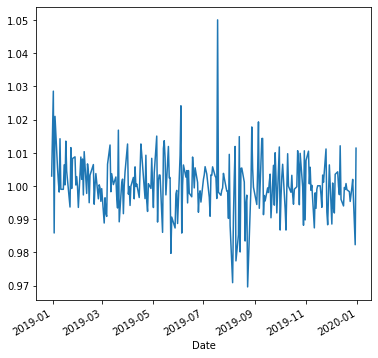

In [108]:
# Build some relative performance measure like the ratio Close/Open
IBM_ret = df.IBM.Close/df.IBM.Open

# Take a look
IBM_ret.plot();



### To Do

1. Prove (analytically) that $\omega^\star$ in fact minimizes the volatility of your investment.

2. Pick two stocks, gather their returns/performance measure in `Python` over a 1 year long period of your choosing, and implement a **nonparametric bootstrap** scheme to get (approximate) estimates for the **standard error** and **MSE** of the plug-in estimator $\widehat{\omega}$.

# Soooo point 1

We start from our variance and we apply the following property:
$$
Var(aX + bY) = a^2 \; \sigma^2_X +  b^2 \; \sigma^2_Y + 2ab \; \sigma_{X,Y}
$$

So we have the following:
$$
Var (\omega \cdot X + (1 - \omega) \cdot Y) =  \omega^2 \; \sigma^2_X + (1-\omega) ^ 2 \; \sigma^2_Y + 2\omega (1- \omega)  \sigma_{X,Y}
$$
Expanding the paretheses we get:
$$
\omega^2 \; \sigma^2_X + \sigma^2_Y + \omega^2 \; \sigma^2_Y -2\omega \sigma^2_Y + 2 \omega \sigma_{X,Y} - 2 \omega^2 \sigma_{X,Y}
$$

Now in order to minimize $\omega$ we have to derivate with respect to $\omega$ and solve the equation $\frac{ d Var(\omega \cdot X + (1 - \omega) \cdot Y)}{d \omega} = 0$

So our taking the derivative wrt to $\omega$ we have:
$$
\frac{ d \; Var(\omega \cdot X + (1 - \omega) \cdot Y)}{d \; \omega} = 2\omega \; \sigma^2_X  +  2\omega \; \sigma^2_Y - 2 \sigma^2_Y + 2 \sigma_{X,Y} - 4 \omega \sigma_{X,Y}
$$

Equating this to 0 and factoring out $\omega$ we have:
$$
\omega (2\sigma^2_X + 2\sigma^2_Y - 4 \sigma_{X,Y}) = 2\sigma^2_X - 2 \sigma_{X,Y}
$$
Finally, solving for $\omega$ we get:
$$
\omega^\star = \frac{2\sigma^2_Y -  2 \sigma_{X,Y}}{2\sigma^2_X + 2\sigma^2_Y - 4 \sigma_{X,Y}}
$$
Simplifying the coefficients:
$$
\omega^\star = \frac{\sigma^2_Y -  \sigma_{X,Y}}{\sigma^2_X + \sigma^2_Y - 2 \sigma_{X,Y}}
$$

# Point 2
2. Pick two stocks, gather their returns/performance measure in `Python` over a 1 year long period of your choosing, and implement a **nonparametric bootstrap** scheme to get (approximate) estimates for the **standard error** and **MSE** of the plug-in estimator $\widehat{\omega}$.

[*********************100%***********************]  2 of 2 completed
253
253


0.8515838537570619

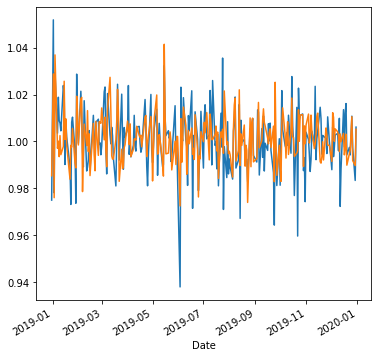

In [109]:
#first things first we clean our data and create our data frame
import numpy as np

df = yf.download("FB, GOOG", start="2019-01-01", end="2020-01-01", group_by="ticker") 

GOOG_ret = df.GOOG.Close/df.GOOG.Open

FB_ret = df["FB"].Close/df["FB"].Open

print(len(GOOG_ret))  
print(len(FB_ret)) # little sanity check to check that they have the same length
FB_ret.plot()
GOOG_ret.plot()

varx, cov  = np.cov(GOOG_ret,FB_ret)[0] # here we unpack the covariance matrix to get both variances and cov
_ , vary = np.cov(GOOG_ret,FB_ret)[1]

w = (vary - cov)/ (varx + vary - 2 *cov)
w #here we calculated omega on our initial data set to compare it with the bootstrapped one


Above we have the graphs of the daily close/open ratio: google in orange and facebook in blue.

0.6444014879116874

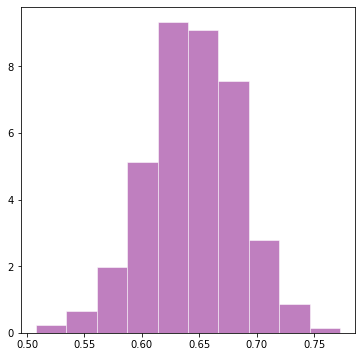

In [110]:
import pandas as pd
# Pre-allocate and initilize
B = 1000
boot_stat = np.zeros(B)

for b in range(B):
    # so here we have to sample from our dataframe
    x_boot = GOOG_ret.sample(n = len(GOOG_ret), replace = True)
    y_boot = FB_ret.sample(n = len(FB_ret), replace = True)

    # Now that we have resampled from our initial dataset we proceed by estimating covariance and the variances.
    
    cov_hat = np.cov(x_boot,y_boot)[0,1]
    
    varx_hat = np.var(x_boot)
    
    vary_hat = np.var(y_boot)
    
    # The last stap is to fill the boot_stat array 
    boot_stat[b] = (vary_hat - cov_hat)/(varx_hat + vary_hat - 2*cov_hat)
    
    # And then iterate

# So now we print the mean and plot the densities
plt.hist(boot_stat, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5);
boot_stat.mean()

So in this case we can see that the difference between our first $ \omega $ and the bootstrapped one is significant, in other cases the diefference is way less, for example in the case of Google and IBM we have 0.37 and 0.42 with a standard error of 0.048 and a MSE of 0.0057. 

In [111]:
# Here we estimate the bootstrapped standard error as we did in the first exercise
boot_stat.std()


0.03949081047062581

To calculate the MSE we have the following formula: 

$$
MSE(\widehat{\theta}) = \mathbb{E}[(\widehat{\theta} - \theta)^2] = Var(\widehat{\theta}) + (Bias(\widehat{\theta}, \theta))^2
$$

So in our case we calculate the variance of our bootstrapped estimator and for the bias squared we subtract the value of $\omega$ previously computed above and the mean of the our boot_stat.

In [112]:
boot_stat.var() + (w - boot_stat.mean())**2 

0.0444840568289135

Now we should be done but as you suggested me in class something's off... 
We are actually bootstrapping a time series in the same way we bootstrapped iid data and the Close/Open rate isn't probably the most descriptive among performance rates.
So the idea is the following: since here we have data which is correlated in time we can't just ignore this fact and resample as the iid case (or at least we shouldn't).
So reading a bit online we stumbled upon Block Bootstrap, in the following cells we tried to implement a block bootstrap were we sample performance of weeks and we calculated the performance of a week using a sharpe ratio 

So for our sharpe ratio $S(x)$ we have 
$$
S(x) = \frac{r_x - R_f}{StdDev(r_x)}
$$
Where basically we have at the nominator the performance of the investment ($r_x$) minus the performance of a super-low risk activity ($R_f$)over the standard deviation of the returns of that given period ($StdDev(r_x)$) which accounts for the volatility

We calculate $r_x$ as $r_x = \prod_{i=1}^{5} \frac{Open_i}{Close_i} - 1$  where open and close are the weekly open and the weekly close 

For $R_f$ we use the US 10y treasury that is in average around 2% so we will use this value for the calculation of all of our sharpe indexes.

There is a little issue with the way we are calculating the sharpe index: doing it in this way we are ignoring 



In [113]:
# So here we calculate the weekly sharpe of our two stock 
# since we calculate the weekly sharpe I thought it might be better to take a 5Y period so as to increase the number of samples we have

GOOG = yf.download("GOOG", start="2015-01-01", end="2020-01-03", group_by="ticker") 


#So our first issue comes with the length of our dataframe, in order to have evenly distributed GOOG_sharpe (of 5 work days we actually do 5 years and 1 day :))

len(df) # originally 1259 now 1260 :)

weekly_perf = 1
GOOG_sharpe = []
curr_week = []
# debug = []
weekcount = 0
c = 1
# Ok so we want to create two 
for i, row in GOOG.iterrows():
    
    open = row["Open"]
    close = row["Close"]
    
    daily_perf = close/open
    weekly_perf *= (daily_perf)
    curr_week.append(daily_perf)
    
    if c % 5 == 0: # so every 5 iterations we calculate the weekly sharpe 
        sharpe = (weekly_perf - 1 - 0.02) / np.array(curr_week).std() 
        
        GOOG_sharpe.append(sharpe)
        weekly_perf = 1
        # debug.append(curr_week)
        # if weekcount == 24:
        #     print(i)
        weekcount += 1 
        curr_week = []
        
    c += 1

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

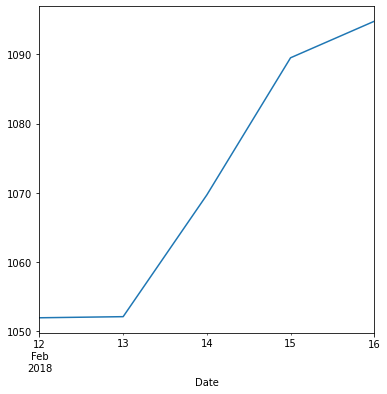

In [114]:
# By reverse engineering (I left the code commented out mostly i got the index of the max and then printed the week
# our sharpe indexes this was the one with the highest sharpe index a good week indeed
GOOGfeb = yf.download("GOOG", start="2018-02-11", end="2018-02-20", group_by="ticker") 
GOOGfeb.Close.plot()

[*********************100%***********************]  1 of 1 completed


<AxesSubplot:xlabel='Date'>

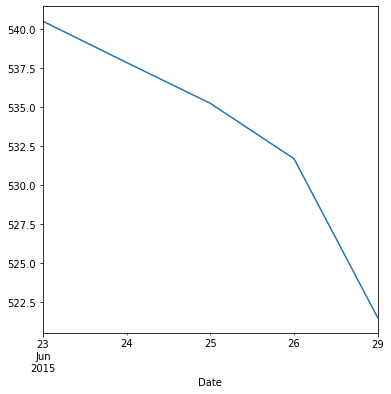

In [115]:
# Whereas the lowest was apparently on the five days before 2015-06-30 so doing as above we can verify 
# if our results made sense

GOOGfeb = yf.download("GOOG", start="2015-06-24", end="2015-06-30", group_by="ticker") 
GOOGfeb.Close.plot()

# Now that we are confident enough with our results we can procede to create the same index for facebook

In [116]:
FB = yf.download("FB", start="2015-01-01", end="2020-01-03", group_by="ticker") 


# So our first issue comes with the length of our dataframe, in order to have evenly distributed FB_sharpe 
# (of 5 work days we actually do 5 years and 1 day :))

len(df) # originally 1259 now 1260 :)
weekly_perf = 1
FB_sharpe = []
curr_week = []
c = 1
# Ok so we want to create two 
for i, row in FB.iterrows():
    
    open = row["Open"]
    close = row["Close"]
    
    daily_perf = close/open
    weekly_perf *=  (daily_perf)
    curr_week.append(daily_perf)
    #print(f'{weekly_perf} at day {c} ')
    if c % 5 == 0:
        sharpe = (weekly_perf - 1 - 0.02) / np.array(curr_week).std() # manca da sottrarre 
        # print(weekly_perf - 1)
        FB_sharpe.append(sharpe)
        weekly_perf = 1
        curr_week = []
    c += 1



[*********************100%***********************]  1 of 1 completed


Ok so now we can procede with the bootstrap

In [117]:
covi = np.cov(GOOG_sharpe,FB_sharpe)[0,1]
varxi = np.var(GOOG_sharpe)

varyi = np.var(FB_sharpe)
omega = (varyi - covi)/(varxi + varyi - 2*covi)
w


0.8515838537570619

The bootstrap mean is: 0.38966726044483446 
the standard error is 0.05060161254454872 and the MSE is 0.01061591704126641


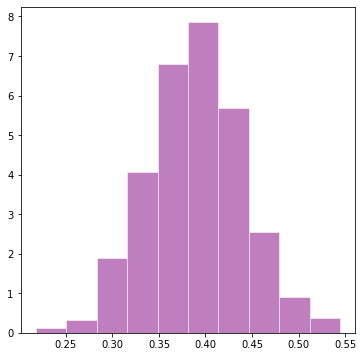

In [118]:
#We have to convert our good ol python lists to dataframes in order to sample
import matplotlib.pyplot as plt
G_sharpes = pd.Series(GOOG_sharpe)

F_sharpes = pd.Series(FB_sharpe)

B = 1000
boot_stat = np.zeros(B)


for b in range(B):
    # so here we have to sample from our dataframe
    G_boot = G_sharpes.sample(n = len(G_sharpes), replace = True)

    F_boot = F_sharpes.sample(n = len(F_sharpes), replace = True)

    
    cov_hat = np.cov(G_boot,F_boot)[0,1]
    
    varx_hat = np.var(G_boot)
    
    vary_hat = np.var(F_boot)
    boot_stat[b] = (vary_hat - cov_hat)/(varx_hat + vary_hat - 2*cov_hat)

plt.hist(boot_stat, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5);

print(f"The bootstrap mean is: {boot_stat.mean()} \nthe standard error is {boot_stat.std()} and the MSE is {boot_stat.var() + (omega - boot_stat.mean())**2 }")


In [119]:
#Another intersting analysis could be to see how much this changes increasing the block sizes for this purpose let me define some functions
#in order to avoid repeating the same code over and over

def create_sharpes(index, blocksize):
    df = yf.download(index, start="2015-01-01", end="2020-01-03", group_by="ticker") 

    weekly_perf = 1
    sharpes = []
    curr_week = []
    c = 1
    
    for i, row in df.iterrows():
        
        open = row["Open"]
        close = row["Close"]
        
        daily_perf = close/open
        weekly_perf *=  (daily_perf)
        curr_week.append(daily_perf)
        
        if c % blocksize == 0:
            sharpe = (weekly_perf - 1 - 0.02) / np.array(curr_week).std()
            sharpes.append(sharpe)
            weekly_perf = 1
            curr_week = []
        c += 1
    return sharpes

def bootstrap(arr1,arr2,len_B):
    sharpes1 = pd.Series(arr1)

    sharpes2 = pd.Series(arr2)

    B = len_B
    boot_stat = np.zeros(B)


    for b in range(B):
        # so here we have to sample from our dataframe
        G_boot = sharpes1.sample(n = len(sharpes1), replace = True)

        F_boot = sharpes2.sample(n = len(sharpes2), replace = True)

        
        cov_hat = np.cov(G_boot,F_boot)[0,1]
        
        varx_hat = np.var(G_boot)
        
        vary_hat = np.var(F_boot)
        boot_stat[b] = (vary_hat - cov_hat)/(varx_hat + vary_hat - 2*cov_hat)
    return boot_stat


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
The bootstrap mean is: 0.5065195939083781 
the standard error is 0.0539352832288172 and the MSE is 0.002991587761789977


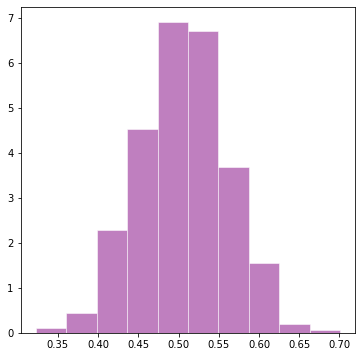

In [120]:
# So let's try again our analysis with a block size of 15

G15_sharpe = create_sharpes("GOOG" , 15)
F15_sharpe = create_sharpes("FB" , 15)

boot = bootstrap(G15_sharpe, F15_sharpe,1000)

cov = np.cov(G15_sharpe,F15_sharpe)[0,1]
        
varG = np.var(G15_sharpe)

varF = np.var(F15_sharpe)
omega = (varF - cov)/(varG + varF - 2*cov)
        
plt.hist(boot, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5);
print(f"The bootstrap mean is: {boot.mean()} \nthe standard error is {boot.std()} and the MSE is {boot.var() + (omega - boot.mean())**2 }")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
The bootstrap mean is: 0.5132112667060226 
the standard error is 0.09698017533035344 and the MSE is 0.00951470986434511


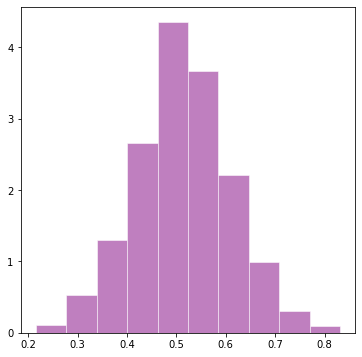

In [121]:
# So let's try again our analysis with a block size of 30

G30_sharpe = create_sharpes("GOOG" , 30)
F30_sharpe = create_sharpes("FB" , 30)

boot = bootstrap(G30_sharpe, F30_sharpe,1000)

cov = np.cov(G30_sharpe,F30_sharpe)[0,1]
        
varG = np.var(G30_sharpe)

varF = np.var(F30_sharpe)
omega = (varF - cov)/(varG + varF - 2*cov)
        

plt.hist(boot, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5);
print(f"The bootstrap mean is: {boot.mean()} \nthe standard error is {boot.std()} and the MSE is {boot.var() + (omega - boot.mean())**2 }")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
The bootstrap mean is: 0.49923745581418816 
the standard error is 0.17567950144669048 and the MSE is 0.2045230472617623


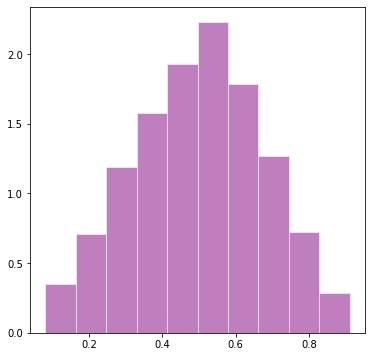

In [122]:

G3_sharpe = create_sharpes("GOOG" , 3)
F3_sharpe = create_sharpes("FB" , 3)

boot = bootstrap(G3_sharpe, G3_sharpe,1000)

cov = np.cov(G3_sharpe,F3_sharpe)[0,1]
        
varG = np.var(G3_sharpe)

varF = np.var(F3_sharpe)
omega = (varF - cov)/(varG + varF - 2*cov)
        


plt.hist(boot, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5)
print(f"The bootstrap mean is: {boot.mean()} \nthe standard error is {boot.std()} and the MSE is {boot.var() + (omega - boot.mean())**2 }")

So one issue with the code above is how the performance is calculated is that using the product of the daily performances as a weekly index of performance we are actually losing out on the possible difference of the closing price of one day and opening price of the day after so in the following cell we implemented another version with the rates of closing of one day with the before. As written in the first comment.
In this way we have that the product:
$$
\prod_{i=2}^{5} \frac{c_i}{c_{i-1}} = \frac{c_5}{c_1} 
$$
Where basically i = 1 is monday and i = 5 is friday. 
So we basically had the strong assumption, in the previous "create_sharpes", of selling every day and buying again the next day.

In [123]:
def create_sharpes_close(index, blocksize):
    df = yf.download(index, start="2015-01-01", end="2020-01-03", group_by="ticker") 

    #mart/lun * merc/mart * giov/merc * ven/giov 
    weekly_perf = 1
    sharpes = []
    curr_week = []
    c = 1
    close1 = 0
    add = 0
    for i, row in df.iterrows():
        close = row["Close"]
        
        if c == 1 or just_app:
            
            oldclose = close
            c += 1
            just_app = False
            
            continue
        
        perf = close/oldclose
        weekly_perf *= perf
        oldclose = close
        curr_week.append(perf)
        
        
        if c % blocksize == 0:
            sharpe = (weekly_perf - 1 - 0.02) / np.array(curr_week).std()
            sharpes.append(sharpe)
            add += 1
            weekly_perf = 1
            curr_week = []
            
            just_app = True
            
        c += 1
    return sharpes

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
The bootstrap mean is: 0.5009714260599765 
the standard error is 0.07585589799281978 and the MSE is 0.1808620615908379


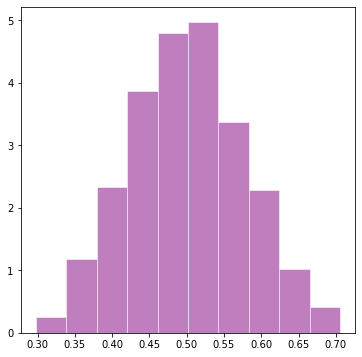

In [124]:

G5_sharpe = create_sharpes_close("GOOG" , 5)
F5_sharpe = create_sharpes_close("FB" , 5)


boot = bootstrap(G5_sharpe, F5_sharpe,1000)

plt.hist(boot, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5)
print(f"The bootstrap mean is: {boot.mean()} \nthe standard error is {boot.std()} and the MSE is {boot.var() + (omega - boot.mean())**2 }")

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
The bootstrap mean is: 0.6222794248557 
the standard error is 0.18553214978727398 and the MSE is 0.3257706040404974


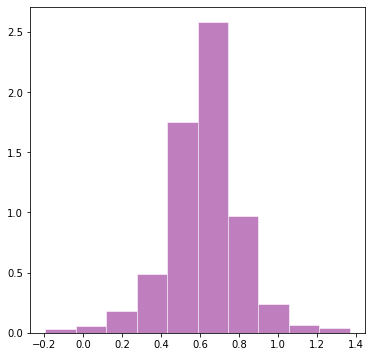

In [125]:
# I just wanted to see what would happen if we only had 10 blocks, probably as we have less and less blocks our bootstrapped \omega will continue 
# to increase and the errors keep getting bigger
G126_sharpe = create_sharpes_close("GOOG" ,126)
F126_sharpe = create_sharpes_close("FB" , 126)


boot = bootstrap(G126_sharpe, F126_sharpe,1000)

plt.hist(boot, density = 1, facecolor='purple', edgecolor = 'white', alpha=0.5)
print(f"The bootstrap mean is: {boot.mean()} \nthe standard error is {boot.std()} and the MSE is {boot.var() + (omega - boot.mean())**2 }")

The result is pretty much consistent among the sharpe examples but is quite far from the first time we calculated $\omega$ and still far but surely closer to the first bootstrapped $\omega$. Still this result is probably more reliable since we are bootstrapping the time series in blocks taking into account the temporal dependencies of time series by bootstrapping in blocks. Sorry if this addendum was way bigger than it should have been but I got a bit carried away.